## General Example

In [20]:
from dd import cudd
from PIL import Image
import random

In [2]:
# https://stackoverflow.com/questions/66160582/learning-binary-decision-diagrams-bdds-from-data-in-python
bdd1 = cudd.BDD()
bdd2 = cudd.BDD()

In [3]:
bdd = cudd.BDD()
bdd.declare('x1', 'x2', 'x3')

In [4]:
# These are the assignments to the input variables
# where the Boolean function is TRUE (the y).
# The assignments where the Boolean function is FALSE
# are not used in the disjunction below.
data = [
    dict(x1=True, x2=False, x3=True),
    dict(x1=True, x2=True, x3=False),
    dict(x1=True, x2=True, x3=True)
]

In [5]:
u = bdd.false

In [6]:
for d in data:
    u |= bdd.cube(d)

In [7]:
[*bdd.pick_iter(u, ['x1', 'x2', 'x3'])]

[{'x1': True, 'x2': False, 'x3': True},
 {'x3': False, 'x1': True, 'x2': True},
 {'x3': True, 'x1': True, 'x2': True}]

In [8]:
bdd.exist(dict(x1=True, x2=False, x3=True), u) == bdd.true

True

In [9]:
bdd.dump('dd-BDD.png', roots=[u])

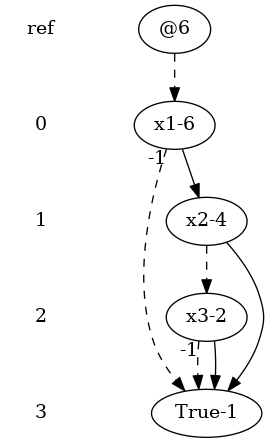

In [12]:
Image.open('dd-BDD.png', mode='r')

In [13]:
filename = 'bdd.json'
bdd.dump(filename, roots=[u])

In [15]:
loaded_bdd = cudd.BDD()
roots = loaded_bdd.load(filename)
loaded_bdd.vars

{'x1', 'x2', 'x3'}

## Experiment

In [16]:
bdd = cudd.BDD()

vars = [f'x{i}' for i in range(10)]
# 1000 vars took 3m 33s

bdd.declare(*vars)

In [22]:
bdd.vars

{'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'}

In [23]:
data = []
for _ in range(30):
    # data.append( {k: bool(round(random.gauss(0, 1),0)) for k in bdd.vars.keys()} )
    data.append( { k: (random.gauss(0, 1)>2) for k in bdd.vars } )

In [24]:
u = bdd.false

for d in data:
    u |= bdd.cube(d)

In [25]:
temp = 0
for _ in range(10_000):
    temp += sum( [(random.gauss(0, 1)>1) for _ in range(10)] )

print(f'AVG true per combination: {temp/10_000:.0f}')

AVG true per combination: 2


In [27]:
{ k: (random.gauss(0, 1)>1) for k in bdd.vars }

{'x5': True,
 'x8': False,
 'x9': False,
 'x6': False,
 'x7': False,
 'x4': False,
 'x1': True,
 'x3': False,
 'x2': False,
 'x0': False}

In [29]:
results = []
for i in range(1_000):
    test_expr = { k: (random.gauss(0, 1)>1) for k in bdd.vars }

    # print(test_expr)
    results.append( bdd.exist(test_expr, u) == bdd.true )

print(f'total true: {sum(results)}')

total true: 1000
